## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

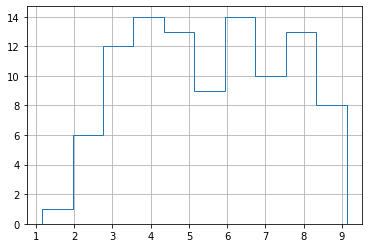

In [6]:
pop.grade.hist(histtype='step')

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


## Bootstrap

To estimate the uncertainty of the mean we will generate a large family of samples from the one we have and characterize the mean over this family. We draw grades randomly (with replacement) and take the mean of the draws

In [9]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.447007
std,1.988488
min,1.160899
25%,3.920676
50%,5.892076
75%,7.233760
max,8.467353


In [10]:
bootstrap = pd.DataFrame({'meangrade':[pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

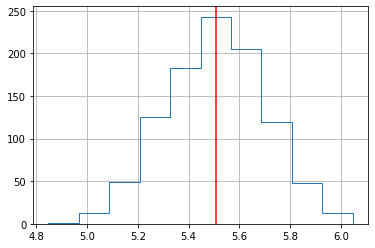

In [12]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(), color='red')

In [15]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.12551803982299, 5.893820960176189)